In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv('train.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
# смотрим на уникальные значения в столбцах с пропущенными значениями
NA = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
     'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
     'PoolQC', 'Fence', 'MiscFeature']
for i in NA:
    print(i, data[i].unique())



LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Alley [nan 'Grvl' 'Pave']
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
MasVnrArea [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6

In [13]:
#столбец Id можно удалить
data.drop('Id', axis=1, inplace=True)

In [14]:
# заменим у числовых признаков nan на 0
to_null =['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for i in to_null:
    data[i].fillna(0, inplace=True)

In [15]:
# заменим у категориалных признаков nan на 'None'
to_none = ['Alley', 'MasVnrType', 'Electrical', 'FireplaceQu', 
           'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
          'GarageType', 'GarageQual', 'GarageFinish', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for i in to_none:
    data[i].fillna('None', inplace=True)

In [16]:
# Разделим датасет на данные с признаками X и целевой переменной y
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

In [17]:
dumm_cols = X.columns[X.dtypes == 'object']

In [18]:
Xd = pd.get_dummies(X, columns=dumm_cols)

In [19]:
#разделим датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(Xd, y, train_size=0.7, random_state=63)

In [20]:
#Построим случайный лес
# выведем качество на train и test
regr = RandomForestRegressor(n_estimators=20, max_depth=5, n_jobs=-1, random_state=0)
regr.fit(X_train, y_train.values.ravel())
regr.score(X_train, y_train), regr.score(X_test, y_test)

(0.9082449017062532, 0.8188336484894876)

In [21]:
# посмотрим качесвто при стантартизации выборки
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
regr.fit(scaler.transform(X_train), y_train.values.ravel())
regr.score(scaler.transform(X_train), y_train), regr.score(scaler.transform(X_test), y_test)

(0.9082328997122019, 0.8191028476595339)

Качество на тесте немного больше при стантартизации выборки

In [22]:
# Построик график важности признаков
def plot_feature_importances(model):
    plt.figure(figsize=(14,70)) 
    n_features = X_test.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_test.columns)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")

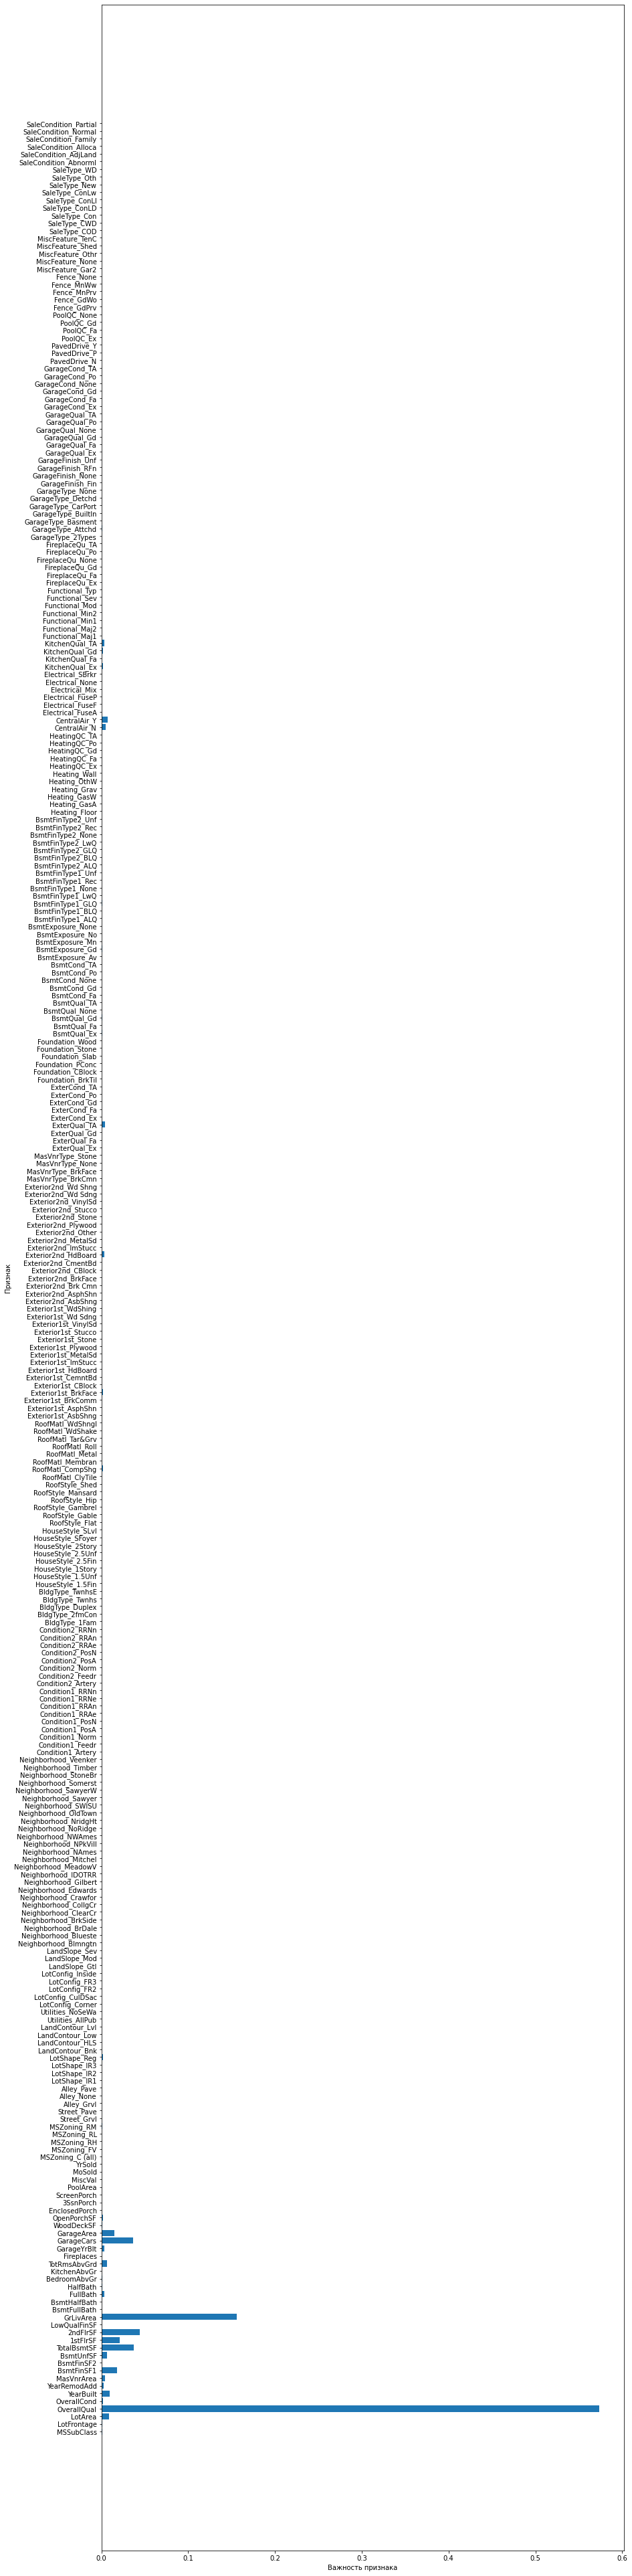

In [23]:
plot_feature_importances(regr)

Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

In [47]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [148]:
regressor = StackingRegressor(
    [
        ('lr', LinearRegression()),
        ('knr', KNeighborsRegressor(n_neighbors=10)),
        ('dtr', DecisionTreeRegressor(max_depth=10, min_samples_leaf=20))
    ],
RandomForestRegressor(max_depth=20, n_estimators=200, min_samples_leaf=20,n_jobs=-1))

In [149]:
regressor.fit(X_train, y_train.values.ravel())

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('knr', KNeighborsRegressor(n_neighbors=10)),
                              ('dtr',
                               DecisionTreeRegressor(max_depth=10,
                                                     min_samples_leaf=20))],
                  final_estimator=RandomForestRegressor(max_depth=20,
                                                        min_samples_leaf=20,
                                                        n_estimators=200,
                                                        n_jobs=-1))

In [134]:
regressor.named_estimators_['lr'].score(X_train, y_train), regressor.named_estimators_['lr'].score(X_test, y_test)

(0.9468835365736363, 0.8099584121479526)

In [142]:
regressor.named_estimators_['knr'].score(X_train, y_train), regressor.named_estimators_['knr'].score(X_test, y_test)

(0.7181059730284418, 0.647547261097114)

In [147]:
regressor.named_estimators_['dtr'].score(X_train, y_train), regressor.named_estimators_['dtr'].score(X_test, y_test)

(0.816776917045348, 0.7461662560541238)

In [150]:
regressor.score(X_train, y_train), regressor.score(X_test, y_test)

(0.9065931205698861, 0.8595842101657936)

Лучший score показала Линейная регрессия, при этом final_estimator показал еще лучший score